In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import math

In [ ]:
# Cargamos los datos de MNIST
datos, metadatos = tfds.load('fashion_mnist', as_supervised = True, with_info = True)

In [ ]:
# Separamos los datos en datos de entrenamiento y datos de prueba.
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']

In [ ]:
nombre_etiqueta = metadatos.features['label'].names
nombre_etiqueta

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
# Normalizamos los datos pasando de 0 - 255 a 0 - 1

def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 # Aca pasamos de 0 - 255 a 0 - 1
  return imagenes, etiquetas

# Usamos la función para normalizar los datos de entrenamiento y prueba.
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

# Agregamos al caché (usamos memoria en lugar de disco, el entrenamiento es más rápido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

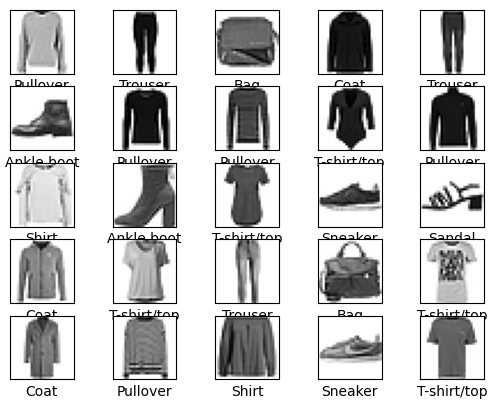

In [ ]:
# Mostramos una imagen por categoría.
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28, 28)) # reajustamos los píxeles.
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap = plt.cm.binary)
  plt.xlabel(nombre_etiqueta[etiqueta])
plt.show()

In [ ]:
# Creamos el modelo.

'''
softmax es una función de activación que se utiliza comúnmente en la capa de salida de una
red neuronal para problemas de clasificación multiclase. Toma un vector de números reales
y los transforma en una distribución de probabilidad, donde la suma de las probabilidades es igual a 1.
Cada valor de la salida después de aplicar softmax representa la probabilidad de que la entrada 
pertenezca a la clase específica. La salida de softmax se interpreta típicamente como la
probabilidad condicional de cada clase dado el input.
'''

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28, 1)),
    tf.keras.layers.Dense(50, activation = tf.nn.relu),
    tf.keras.layers.Dense(50, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [ ]:
# Compilamos el modelo.

'''
SparseCategoricalCrossentropy se utiliza comúnmente para problemas de
clasificación cuando las etiquetas son enteros. Esta función de pérdida
compara las predicciones del modelo con las etiquetas reales y calcula
la pérdida asociada.
'''

modelo.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

In [ ]:
cantidad_train = metadatos.splits['train'].num_examples
cantidad_test = metadatos.splits['test'].num_examples
print('Cantidad de datos para entrenamiento:', cantidad_train)
print('Cantidad de datos para pruebas:', cantidad_test)

Cantidad de datos para entrenamiento: 60000
Cantidad de datos para pruebas: 10000


In [ ]:
# Para hacer que el modelo entrene más rápido lo podemos hacer en lotes.
lote = 32

# Entrenamos los datos de manera aleatoria.
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(cantidad_train).batch(lote)
datos_pruebas = datos_pruebas.batch(lote)

In [ ]:
#Entrenamos el modelo
entrenar = modelo.fit(datos_entrenamiento, epochs = 5, steps_per_epoch = math.ceil(cantidad_train/lote))

Epoch 1/5
1875/1875 [==============================] - 16s 4ms/step - loss: 0.5181 - accuracy: 0.8183
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3838 - accuracy: 0.8601
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3525 - accuracy: 0.8699
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3213 - accuracy: 0.8812
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3112 - accuracy: 0.8861


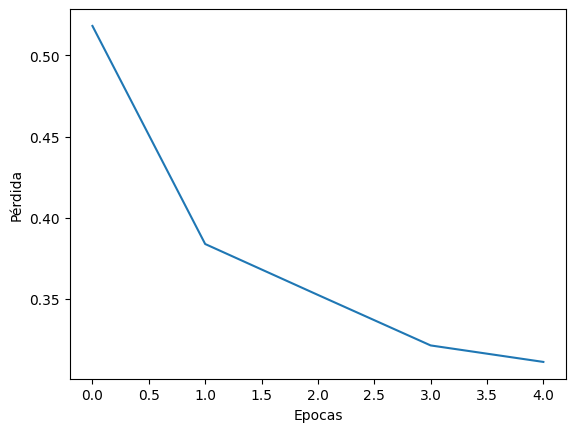

In [ ]:
plt.xlabel('Epocas')
plt.ylabel('Pérdida')
plt.plot(entrenar.history['loss'])